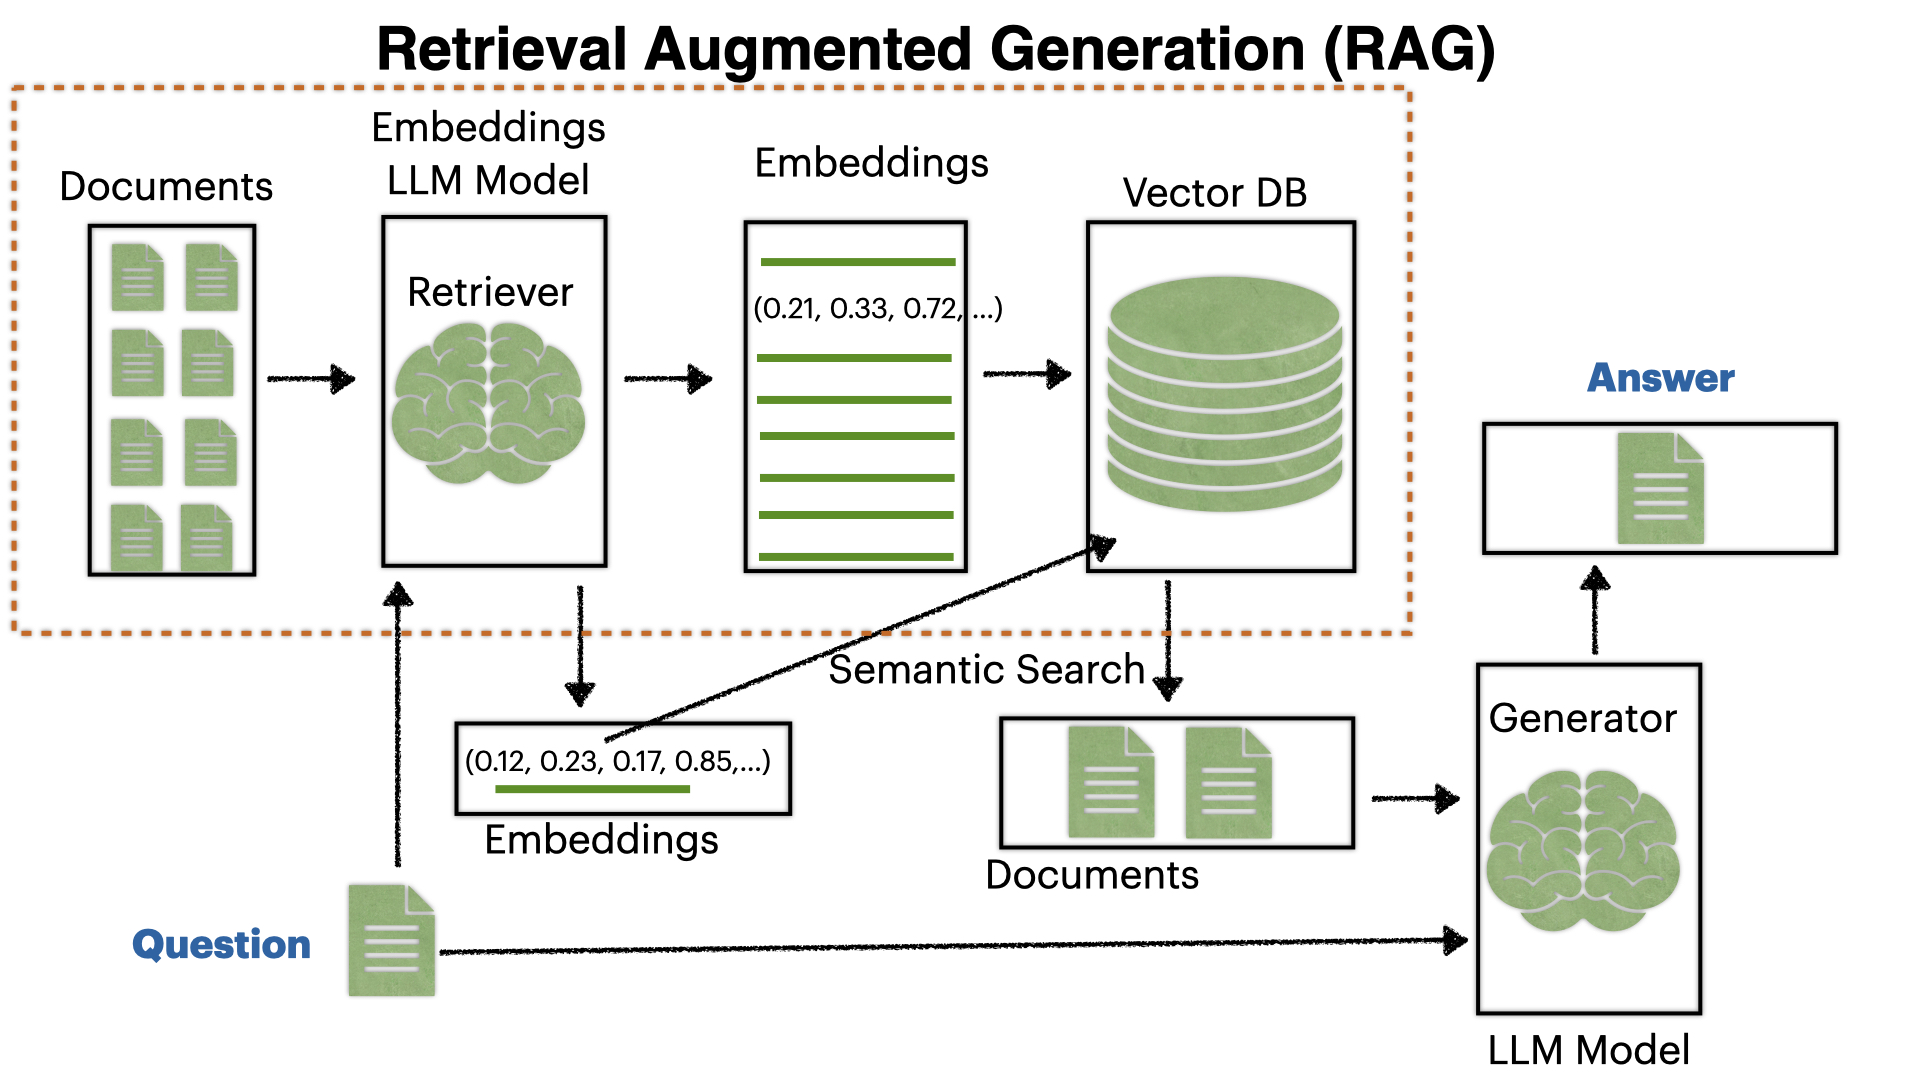

In [9]:
from IPython.display import Image
Image("/Users/sridharkannam/Desktop/Youtube_Thumbnails/rag_metrics/rag_metrics.004.jpeg")

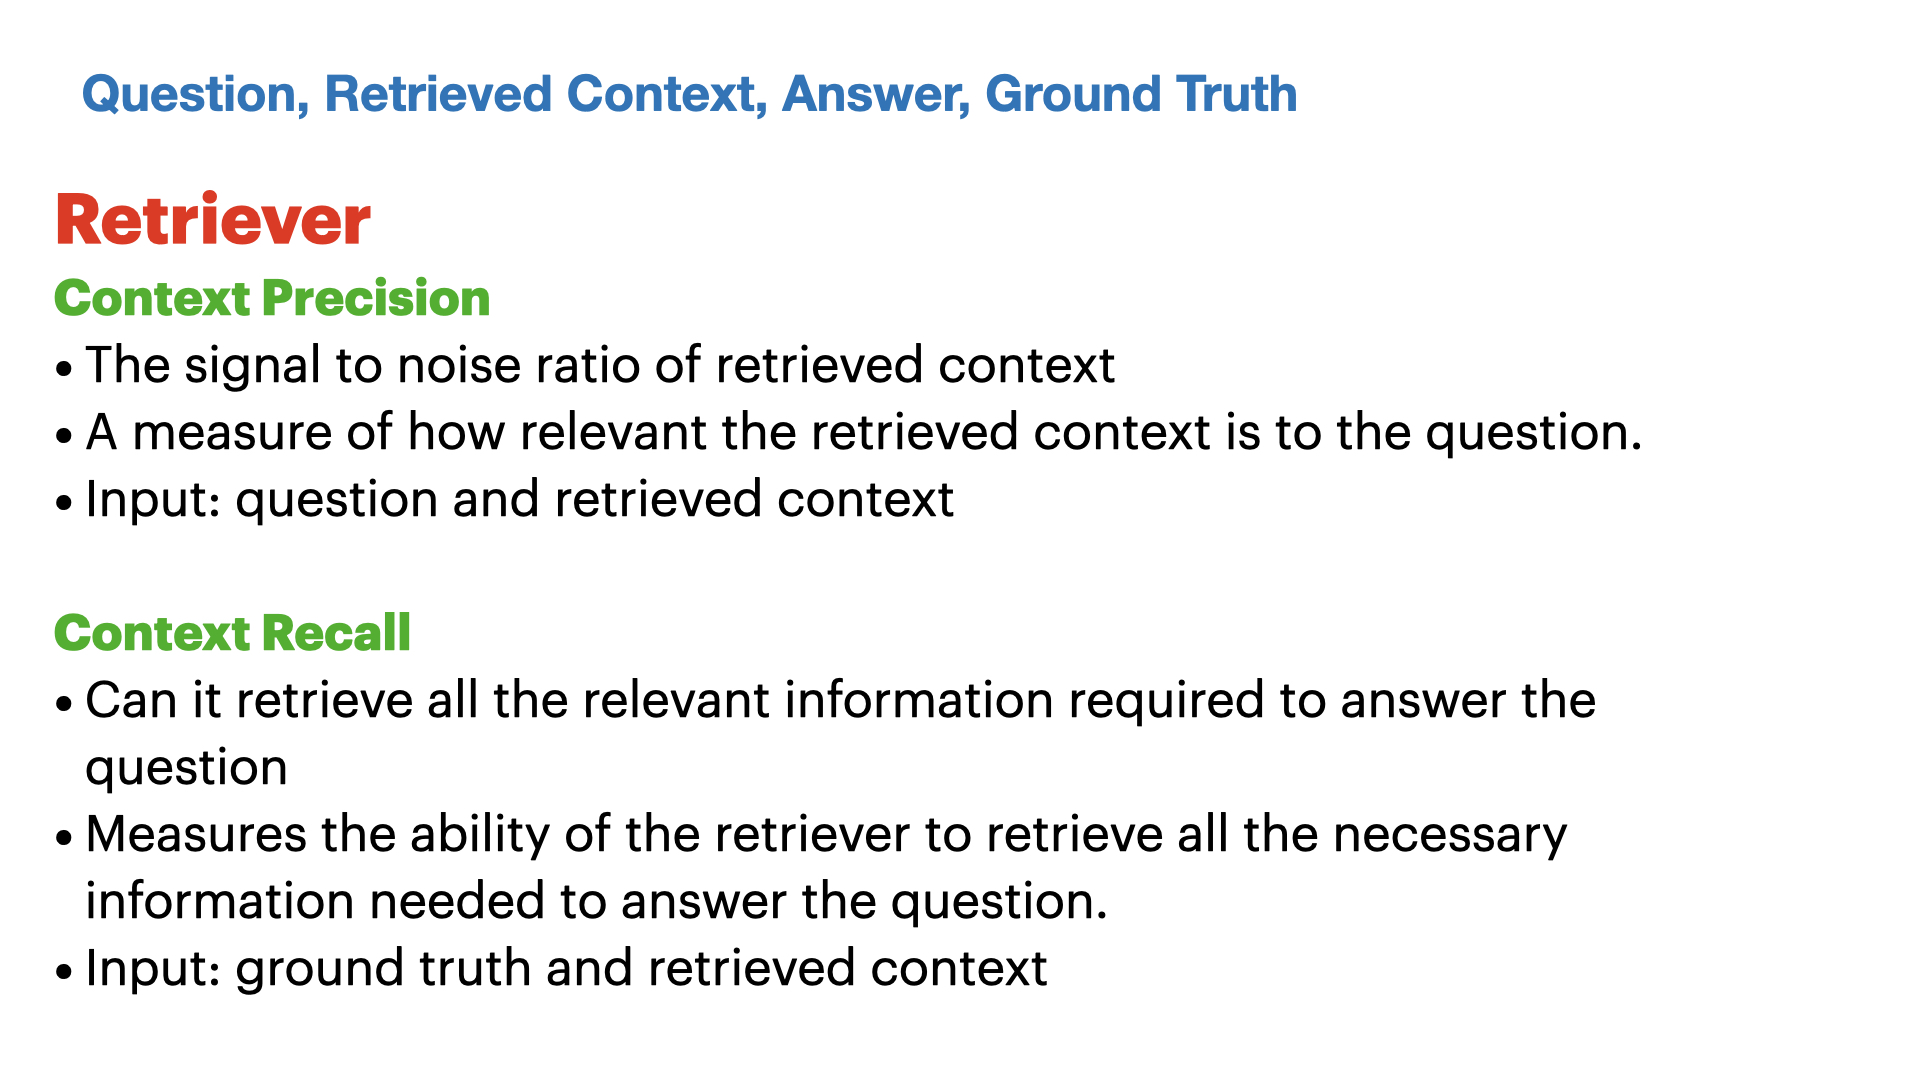

In [10]:
Image("/Users/sridharkannam/Desktop/Youtube_Thumbnails/rag_metrics/rag_metrics.005.jpeg")

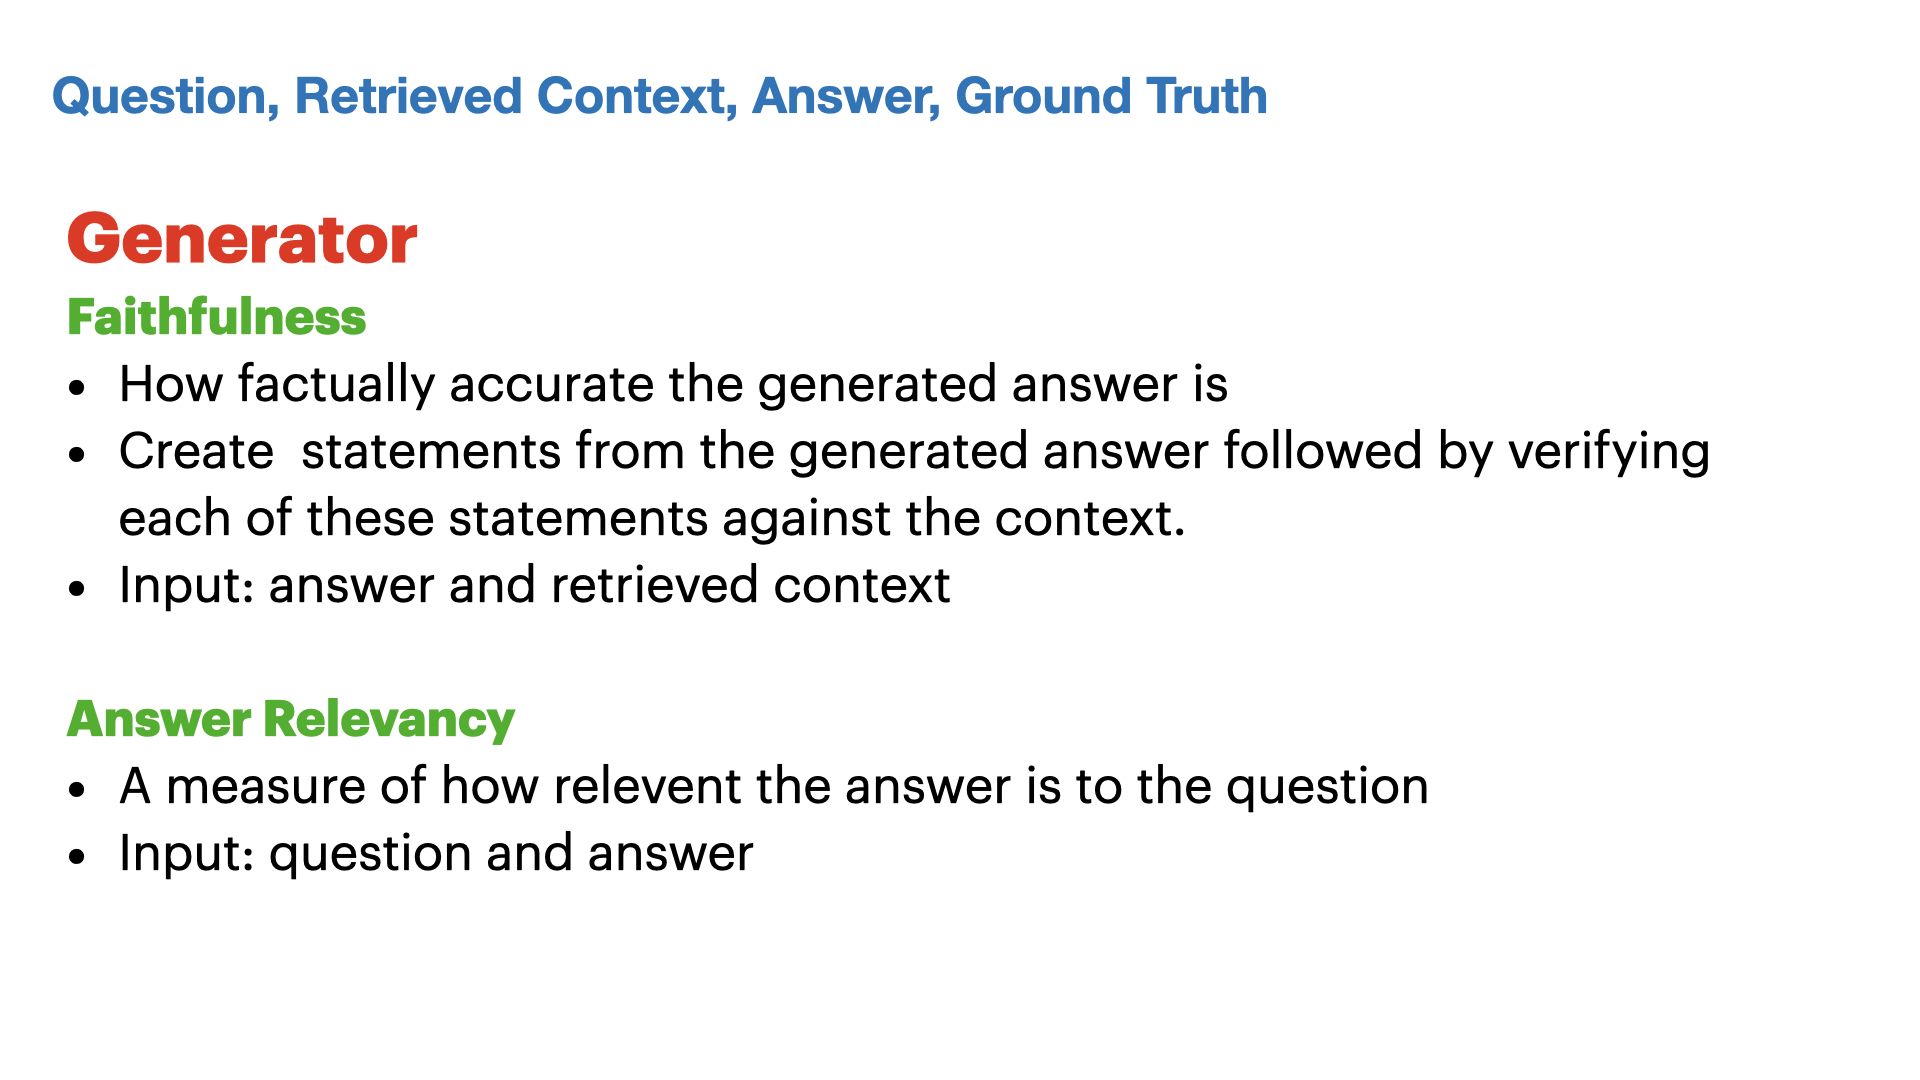

In [11]:
Image("/Users/sridharkannam/Desktop/Youtube_Thumbnails/rag_metrics/rag_metrics.006.jpeg")

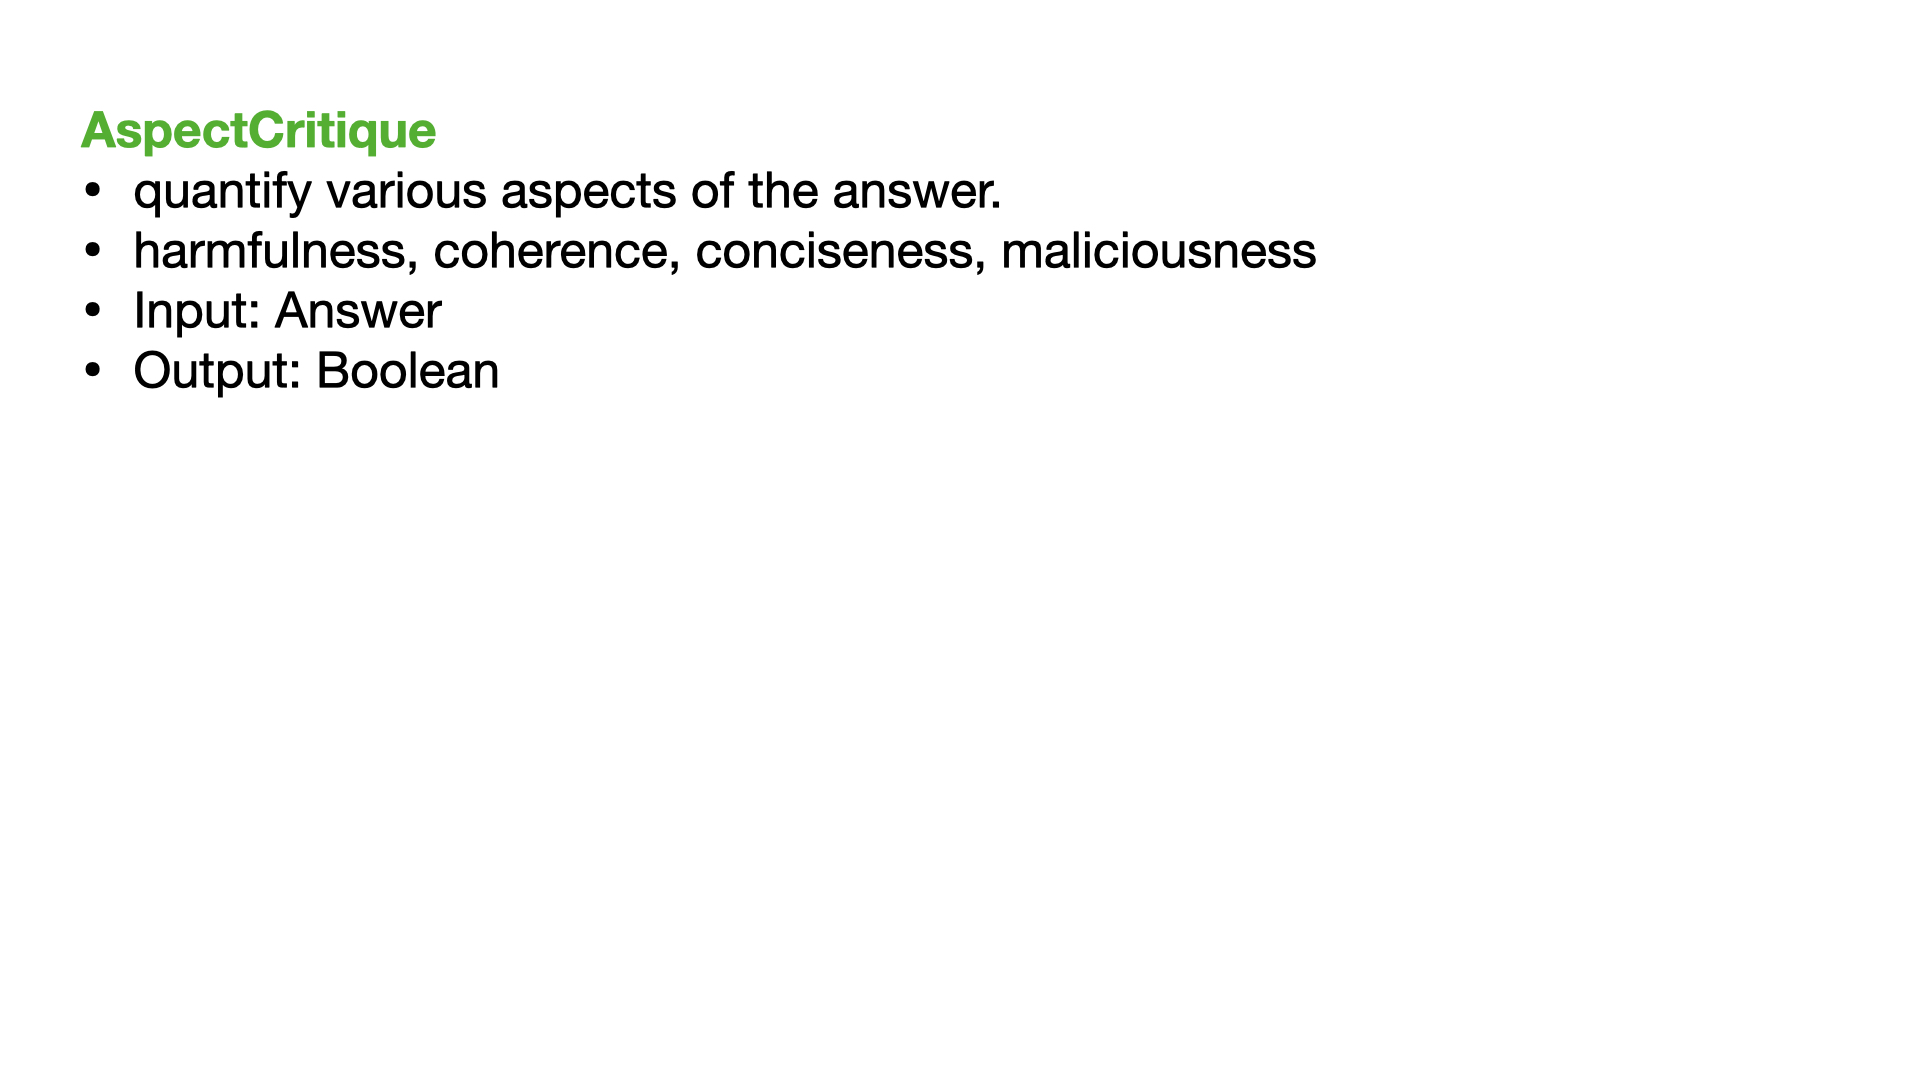

In [12]:
Image("/Users/sridharkannam/Desktop/Youtube_Thumbnails/rag_metrics/rag_metrics.007.jpeg")

<p>
    <a href="https://colab.research.google.com/github/explodinggradients/ragas/blob/main/docs/quickstart.ipynb">
        <img alt="Open In Colab" 
             align="left"
             src="https://colab.research.google.com/assets/colab-badge.svg">
    </a>
    <br>
    <h1> Quickstart </h1>
</p>

welcome to the ragas quickstart. We're going to get you up and running with ragas as qickly as you can so that you can go back to improving your Retrieval Augmented Generation pipelines while this library makes sure your changes are improving your entire pipeline.

to kick things of lets start with the data

> Note: Are you using Azure OpenAI endpoints? Then checkout [this quickstart guide](./guides/quickstart-azure-openai.ipynb)

In [1]:
# if using colab uncomment this
#!pip install ragas

Ragas also uses OpenAI for running some metrics so make sure you have your openai key ready and available in your environment

In [2]:
import os

#os.environ["OPENAI_API_KEY"] = "your-openai-key"

## The Data

Ragas performs a `ground_truth` free evaluation of your RAG pipelines. This is because for most people building a gold labeled dataset which represents in the distribution they get in production is a very expensive process.

**Note:** *While originially ragas was aimed at `ground_truth` free evalutions there is some aspects of the RAG pipeline that need `ground_truth` in order to measure. We're in the process of building a testset generation features that will make it easier. Checkout [issue#136](https://github.com/explodinggradients/ragas/issues/136) for more details.*

Hence to work with ragas all you need are the following data
- question: `list[str]` - These are the questions you RAG pipeline will be evaluated on. 
- answer: `list[str]` - The answer generated from the RAG pipeline and give to the user.
- contexts: `list[list[str]]` - The contexts which where passed into the LLM to answer the question.
- ground_truths: `list[list[str]]` - The ground truth answer to the questions. (only required if you are using context_recall)

Ideally your list of questions should reflect the questions your users give, including those that you have been problamatic in the past.

Here we're using an example dataset from on of the baselines we created for the [Financial Opinion Mining and Question Answering (fiqa) Dataset](https://sites.google.com/view/fiqa/) we created. If you want to want to know more about the baseline, feel free to check the `experiements/baseline` section

In [1]:
# data
from datasets import load_dataset

fiqa_eval = load_dataset("explodinggradients/fiqa", "ragas_eval")
fiqa_eval

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DatasetDict({
    baseline: Dataset({
        features: ['question', 'ground_truths', 'answer', 'contexts'],
        num_rows: 30
    })
})

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [14]:
df.head()

question  \
0  How to deposit a cheque issued to an associate in my business into my business account?   
1                                        Can I send a money order from USPS as a business?   
2                                       1 EIN doing business under multiple business names   
3                                               Applying for and receiving business credit   
4                                                     401k Transfer After Business Closure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ground_truths  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [15]:
df = fiqa_eval['baseline'].to_pandas()
print(df.iloc[0])

question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Metrics

Ragas provides you with a few metrics to evaluate the different aspects of your RAG systems namely

1. metrics to evaluate retrieval: offers `context_precision` and `context_recall` which give you the measure of the performance of your retrieval system. 
2. metrics to evaluate generation: offers `faithfulness` which measures hallucinations and `answer_relevancy` which measures how to the point the answers are to the question.

The harmonic mean of these 4 aspects gives you the **ragas score** which is a single measure of the performance of your QA system across all the important aspects.

now lets import these metrics and understand more about what they denote

In [5]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)
from ragas.metrics.critique import harmfulness

here you can see that we are using 4 metrics, but what do the represent?

1. context_precision - a measure of how relevant the retrieved context is to the question. Conveys quality of the retrieval pipeline.
2. answer_relevancy - a measure of how relevent the answer is to the question
3. faithfulness - the factual consistancy of the answer to the context base on the question.
4. context_recall: measures the ability of the retriever to retrieve all the necessary information needed to answer the question. 
5. harmfulness (AspectCritique) - in general, `AspectCritique` is a metric that can be used to quantify various aspects of the answer. Aspects like harmfulness, maliciousness, coherence, correctness, concisenes are available by default but you can easily define your own. Check the [docs](./metrics.md) for more info.

**Note:** *by default these metrics are using OpenAI's API to compute the score. If you using this metric make sure you set the environment key `OPENAI_API_KEY` with your API key. You can also try other LLMs for evaluation, check the [llm guide](./guides/llms.ipynb) to learn more*

If you're interested in learning more, feel free to check the [docs](https://github.com/explodinggradients/ragas/blob/main/docs/metrics.md)

## Evaluation

Running the evalutation is as simple as calling evaluate on the `Dataset` with the metrics of your choice.

In [7]:
from ragas import evaluate

result = evaluate(
    fiqa_eval["baseline"],
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
        harmfulness,
    ],
)

result

evaluating with [context_precision]


100%|████████████████████████████████████████████████████████████| 2/2 [03:48<00:00, 114.17s/it]


evaluating with [faithfulness]


100%|████████████████████████████████████████████████████████████| 2/2 [06:18<00:00, 189.14s/it]


evaluating with [answer_relevancy]


100%|█████████████████████████████████████████████████████████████| 2/2 [01:14<00:00, 37.19s/it]


evaluating with [context_recall]


100%|████████████████████████████████████████████████████████████| 2/2 [08:14<00:00, 247.18s/it]


evaluating with [harmfulness]


100%|█████████████████████████████████████████████████████████████| 2/2 [01:31<00:00, 45.60s/it]


{'ragas_score': 0.6200, 'context_precision': 0.6068, 'faithfulness': 0.7606, 'answer_relevancy': 0.9270, 'context_recall': 0.4149, 'harmfulness': 0.0000}

and there you have the it, all the scores you need. `ragas_score` gives you a single metric that you can use while the other onces measure the different parts of your pipeline.

now if we want to dig into the results and figure out examples where your pipeline performed worse or really good you can easily convert it into a pandas array and use your standard analytics tools too!

In [8]:
df = result.to_pandas()
df.head()

,question,contexts,answer,ground_truths,context_precision,faithfulness,answer_relevancy,context_recall,harmfulness
0,How to deposit a cheque issued to an associate...,[Just have the associate sign the back and the...,\nThe best way to deposit a cheque issued to a...,[Have the check reissued to the proper payee.J...,0.411765,0.666667,0.976915,0.111111,0
1,Can I send a money order from USPS as a business?,[Sure you can. You can fill in whatever you w...,"\nYes, you can send a money order from USPS as...",[Sure you can. You can fill in whatever you w...,0.428571,1.000000,0.883583,0.800000,0
2,1 EIN doing business under multiple business n...,[You're confusing a lot of things here. Compan...,"\nYes, it is possible to have one EIN doing bu...",[You're confusing a lot of things here. Compan...,0.666667,1.000000,0.928275,0.933333,0
3,Applying for and receiving business credit,[Set up a meeting with the bank that handles y...,\nApplying for and receiving business credit c...,"[""I'm afraid the great myth of limited liabili...",0.722222,1.000000,0.916893,0.000000,0
4,401k Transfer After Business Closure,[The time horizon for your 401K/IRA is essenti...,\nIf your employer has closed and you need to ...,[You should probably consult an attorney. Howe...,0.478261,0.666667,0.894670,0.000000,0


And thats it!

if you have any suggestion/feedbacks/things your not happy about, please do share it in the [issue section](https://github.com/explodinggradients/ragas/issues). We love hearing from you 😁

In [16]:
df = fiqa_eval['baseline'].to_pandas()
print(df.iloc[3])

question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [4]:
df.head()

question  \
0  How to deposit a cheque issued to an associate in my business into my business account?   
1                                        Can I send a money order from USPS as a business?   
2                                       1 EIN doing business under multiple business names   
3                                               Applying for and receiving business credit   
4                                                     401k Transfer After Business Closure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ground_truths  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          